# **Umair Ahmad** 
# **21i-2081** 

# **DS-5003/2003 Statistical and Mathematical tools for Data Science (Fall 2021)**
We are required to break our analysis  into descriptive statistics to construct the answer by using hypothesis testing.
City Controller Office has released payroll information for all Los Angeles City employees on a
quarterly basis since 2013. Data includes department titles, job titles, projected annual salaries
(with breakdowns of quarterly pay), bonuses, and benefits information of employees.
Government is interested in knowing answers to the questions mentioned below for future
betterment of different departments.



This is an R Markdown Notebook. When you execute code within the notebook, the results appear beneath the code.

Try executing this chunk by clicking the Run button within the chunk or by placing your cursor inside it and pressing Ctrl+Shift+Enter.

## **City Payroll Data** 
The Los Angeles City Controller Office releases payroll information for all city employees on a quarterly basis since 2013.

**Content**

Data includes department titles, job titles, projected annual salaries (with breakdowns of quarterly pay), bonuses, and benefits information.




# **Problem Statment**

**Question 1:**Do the employees working as Police Officer-II have a better chance of getting
Temporary Bonus Pay?

**Question 2:**Employees who get Permanent Bonus Pay are most likely to be from Public Works-
Sanitation Department?

**Question 3:** Do the employees working in Water and Power (DWP) Department have a better
chance of being employed overtime?


**Question 4.** In 2014, employees of Recreation and Parks Department were complaining that
they have been denied the Longevity Bonus Pay. Confirm their complaint from the given dataset.

**Question 5:** Senior Clerk Typist from Harbor (Port of LA) Department has been telling Senior
Clerk Typist of Water and Power (DWP) Department that they have more Average Health Cost
than them. Accept or Reject this claim according to the dataset given.

# **Importing Libraries**


In [2]:
# Importing libraries 
library(tidyverse)
library(ggplot2)
install.packages("gginference")
library(gginference)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Data Reading for Analysis using R Function "read.csv" 

In [3]:
#Data Reading
#Load Data
df=read.csv("/content/CityPayrollDataset.csv",header = FALSE, na = c("","NA"))



colnames(df)=c('RowID','Year','Department_Title','Payroll_Department','Record_Number',
                 'Job_Class_Title','Employment_Type','Hourly_Event_Rate','Projected_Annual_Salary','Q1_Payments','Q2_Payments','Q3_Payments','Q4_Payments',
'Payments_Over_Base_Pay','Perc_Over_Base_Pay','Total_Payments','Base_Pay',
'Permanent_Bonus_Pay','Longevity_Bonus_Pay',
'Temporary_Bonus_Pay','Lump_Sum_Pay','Overtime_Pay','Other_Pay_Adjustments','Other_Pay','MOU','MOU_Title','FMS_Department',
'Job_Class','Pay_Grade','Average_Health_Cost','Average_Dental_Cost',
'Average_Basic_Life','Average_Benefit_Cost','Benefits_Plan','Job_Class_Link')


df=df[-(1),]


In [4]:
head(df)

,RowID,Year,Department_Title,Payroll_Department,Record_Number,Job_Class_Title,Employment_Type,Hourly_Event_Rate,Projected_Annual_Salary,Q1_Payments,⋯,MOU_Title,FMS_Department,Job_Class,Pay_Grade,Average_Health_Cost,Average_Dental_Cost,Average_Basic_Life,Average_Benefit_Cost,Benefits_Plan,Job_Class_Link
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,111391,2014,Water And Power (DWP),NA,1412316577,Commercial Service Representative,Full Time,NA,$70386.48,$16129.89,⋯,NA,98,1230,NA,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
3,31732,2013,Police (LAPD),4301,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,⋯,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
4,27697,2013,Police (LAPD),4301,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,⋯,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
5,14136,2013,Harbor (Port of LA),3201,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,⋯,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
6,91896,2014,Public Works - Sanitation,7024,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,⋯,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
7,106560,2014,Water And Power (DWP),NA,681385707,Security Officer,Full Time,NA,$65959.92,$26530.26,⋯,NA,98,3181,NA,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/3181.pdf


In [5]:
str(df)

'data.frame':	285008 obs. of  35 variables:
 $ RowID                  : chr  "111391" "31732" "27697" "14136" ...
 $ Year                   : chr  "2014" "2013" "2013" "2013" ...
 $ Department_Title       : chr  "Water And Power (DWP)" "Police (LAPD)" "Police (LAPD)" "Harbor (Port of LA)" ...
 $ Payroll_Department     : chr  NA "4301" "4301" "3201" ...
 $ Record_Number          : chr  "1412316577" "432728338" "97182506" "950136941" ...
 $ Job_Class_Title        : chr  "Commercial Service Representative" "Police Officer I" "Police Officer II" "Senior Security Officer" ...
 $ Employment_Type        : chr  "Full Time" "Full Time" "Full Time" "Full Time" ...
 $ Hourly_Event_Rate      : chr  NA "$25.12" "$42.77" "$28.75" ...
 $ Projected_Annual_Salary: chr  "$70386.48" "$52450.56" "$89303.76" "$60028.96" ...
 $ Q1_Payments            : chr  "$16129.89" "$11331.00" "$20036.32" "$15793.88" ...
 $ Q2_Payments            : chr  "$17829.78" "$13859.93" "$23479.20" "$18560.38" ...
 $ Q3_Payments 

In [6]:
summary(df)

    RowID               Year           Department_Title   Payroll_Department
 Length:285008      Length:285008      Length:285008      Length:285008     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Record_Number      Job_Class_Title    Employment_Type    Hourly_Event_Rate 
 Length:285008      Length:285008      Length:285008      Length:285008     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Projected_Annual_Salary Q1_Payments        Q2_Payments       
 Length:285008           Length:285008      Length:285008     
 Class :character        Class :character   Class :character  
 Mode  :character        Mode  :character   Mode  :character  
 Q3_Payments        Q4_Payments        Payments_Over_Base_Pay
 Length:285008      Length:285008      Length:285008         
 Class :

# **Preprocessing**
**DATA CLEANING**
Taking only selective columns that are to be used in different tasks and checking for null or missing values in them.

Column overtime pay has missing values all other columns are complete.
Exploring other variables in dataframe with respect to overtime pay to find out if there is any possible pattern for missing value or it is randomly missing.

It is found that employees belonging to DWP Department have missing overtime pay. So we fill all the missing values with 0.


In [7]:
any(is.na(df$Department_Title) )
any(is.na(df$Employment_Type))
any(is.na(df$Job_Class_Title))
any(is.na(df$Temporary_Bonus_Pay))
any(is.na(df$Longevity_Bonus_Pay  ))
any(is.na(df$Permanent_Bonus_Pay ))
any(is.na(df$Overtime_Pay ))
any(is.na(df$Base_Pay))
any(is.na(df$Average_Benefit_Cost ))
any(is.na(df$Average_Health_Cost ))
any(is.na(df$Year ))
any(is.na(df$Projected_Annual_Salary))

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

Column overtime pay has missing values all other columns are complete.

Exploring other variables in dataframe with respect to "overtime pay" to find out if there is any possible pattern for missing value or it is randomly missing.

In [8]:
ovPay=df[is.na(df$Overtime_Pay),c('Year','Department_Title',
                 'Job_Class_Title','Employment_Type','Base_Pay',
'Permanent_Bonus_Pay','Longevity_Bonus_Pay',
'Temporary_Bonus_Pay','Lump_Sum_Pay','Overtime_Pay','Average_Health_Cost','Average_Dental_Cost',
'Average_Benefit_Cost') ]

It is found that employees belonging to DWP Department have missing overtime pay.So we fill all the missing values with 0.

In [9]:
df$Overtime_Pay[is.na(df$Overtime_Pay)]= "0"

Checking column again to see it the missing values are filled correctly.

In [10]:
any(is.na(df$Overtime_Pay ))

[1] FALSE

Converting character values of different pays to numeric values so that they can be used for testing.

In [11]:
longBonusPay=as.numeric(gsub("[$,]", "", df$Longevity_Bonus_Pay ) )
permanantBonusPay=as.numeric(gsub("[$,]", "", df$Permanent_Bonus_Pay) )
overTimePay=as.numeric(gsub("[$,]", "", df$Overtime_Pay) )
basePay=as.numeric(gsub("[$,]", "", df$Base_Pay) )
avgBenefitCost=as.numeric(gsub("[$,]", "", df$Average_Benefit_Cost) )
avgHealthCost=as.numeric(gsub("[$,]", "", df$Average_Health_Cost) )
tempBonusPay=as.numeric(gsub("[$,]", "", df$Temporary_Bonus_Pay ))
projected_annual_pay=as.numeric((gsub("[$,]", "", df$Projected_Annual_Salary )))

Extracting categorical variables from initial dataframe.

In [12]:
department=df$Department_Title
employmentType=df$Employment_Type
jobClassTitle=df$Job_Class_Title
year=df$Year

Creating a new dataframe that contains clean data that can we used for the given tasks.

In [13]:
cleanData=data.frame(year,department,employmentType,jobClassTitle,tempBonusPay,basePay,longBonusPay,permanantBonusPay,overTimePay,avgBenefitCost,avgHealthCost,projected_annual_pay)

# **Question 1**
**Do the employees working as Police Officer-II have a better chance of getting Temporary Bonus Pay?**

In this question we have to check whether police officer II have better chance of its mean temporary bonus pay being higher than other employees.

For Hypothesis **testing condition checking**

For this we’ll perform following steps:

Take Random Sampling

1. Independent Sampling event
2. Either with replacement + Or size of sample must less than 1/10th of population size
3. Sample Distribution and Sample Size 
4. Check distribution, if It’s Normal sample size can be less than 15
5. If distribution is slightly skewed, sample size can in between 16-30
6. If distribution is highly skewed, then consider increasing sample size

Let’s complete the process one by one.

In [14]:
pop_mean=mean(cleanData$tempBonusPay)

Extracting  police officer II population segment

In [15]:
pop_police=cleanData[cleanData$jobClassTitle=="Police Officer II",]

Plotting population distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



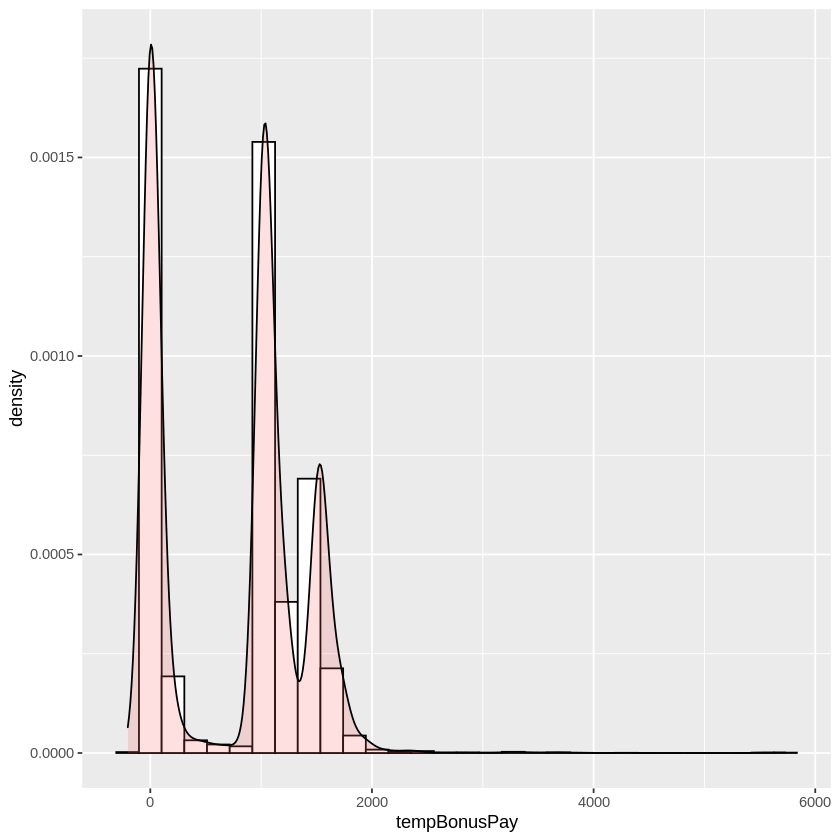

In [16]:
ggplot(data=pop_police, aes(x =tempBonusPay)) +
         geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666")

As population data is skewed, size of sample greater than 30 should be considered. taking n=100.

To ensure randomness and independence we will use simple random sampling and taking sample size less than 10% of population.

In [17]:
sample_police = pop_police[sample(nrow(pop_police), 100, replace = FALSE), ]

# **Stating hypothesis**
**Solution**

**Step 1:** Formulate Null and Alternative Hypothesis

Null hypothesis states that mean of temporary bonus pay taken by Police Officer II is greater than population mean.Whereas alternate hypothesis states that it is less than population mean.

1. Ho=u>uo

2. Ha=u<=uo

where uo=population mean

**Step 2:** Set significance level and Sample data conditions check

1. alpha=0.05

We’ll use default value of Significance Level, As it is a one tailed test, so our alpha <- 0.05. Now perform a condition check. 

**Step 3:** Calculate T-Statistics

**Step 4:** Draw Conculsion

Performing hypothesis test

In [18]:
#**Step 3:** Calculate T-Statistics
res_police=t.test(sample_police$tempBonusPay,mu=pop_mean,alternative = "less")
res_police


	One Sample t-test

data:  sample_police$tempBonusPay
t = 5.6651, df = 99, p-value = 1
alternative hypothesis: true mean is less than 460.6198
95 percent confidence interval:
     -Inf 939.5785
sample estimates:
mean of x 
 831.0173 


Warning message:
“geom_vline(): Ignoring `data` because `xintercept` was provided.”


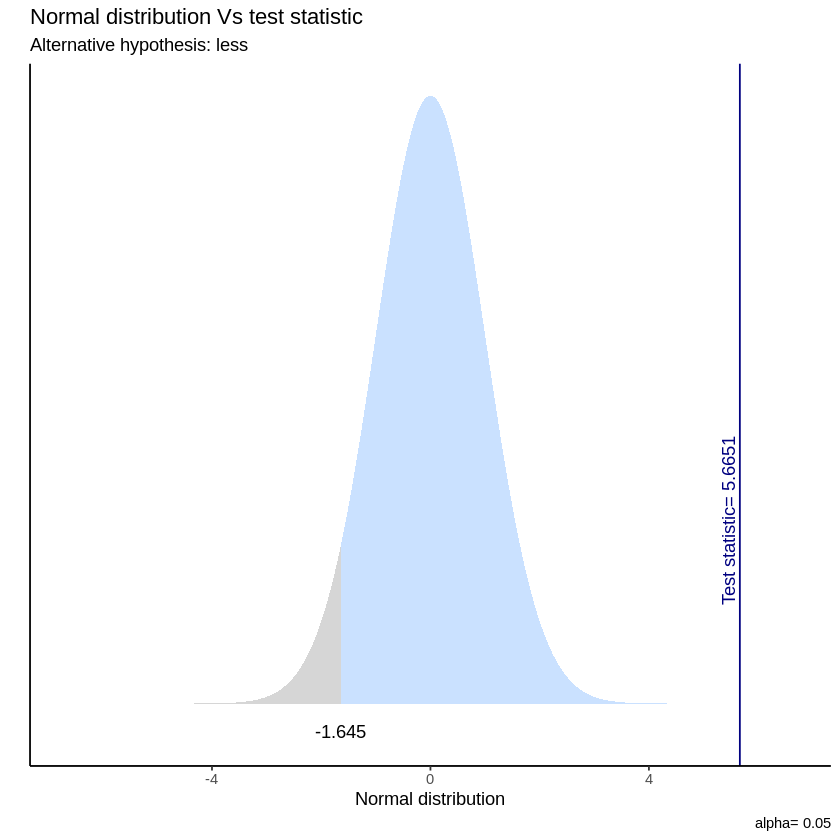

In [19]:
ggttest(res_police)

# **Question 1 Draw Conclusion**

According to the plots as well as p-value being **greater than alpha we fail to reject null hypothesis** and conclude with 95% confidence level that police officer II have better chance of getting temporary bonus pay.




# **Question 2**
**Employees who get Permanent Bonus Pay are most likely to be from Public Works- Sanitation Department?**

In this question we are required to check whether mean of permanant bonus pay of Public Works Sanitation Dept is greater than population mean.

In [20]:
pop_mean2=mean(cleanData$permanantBonusPay)

Extracting  Public Works Sanitation population segment

In [21]:
pop_public_work=cleanData[cleanData$department=="Public Works - Sanitation",]

Plotting population distribution.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



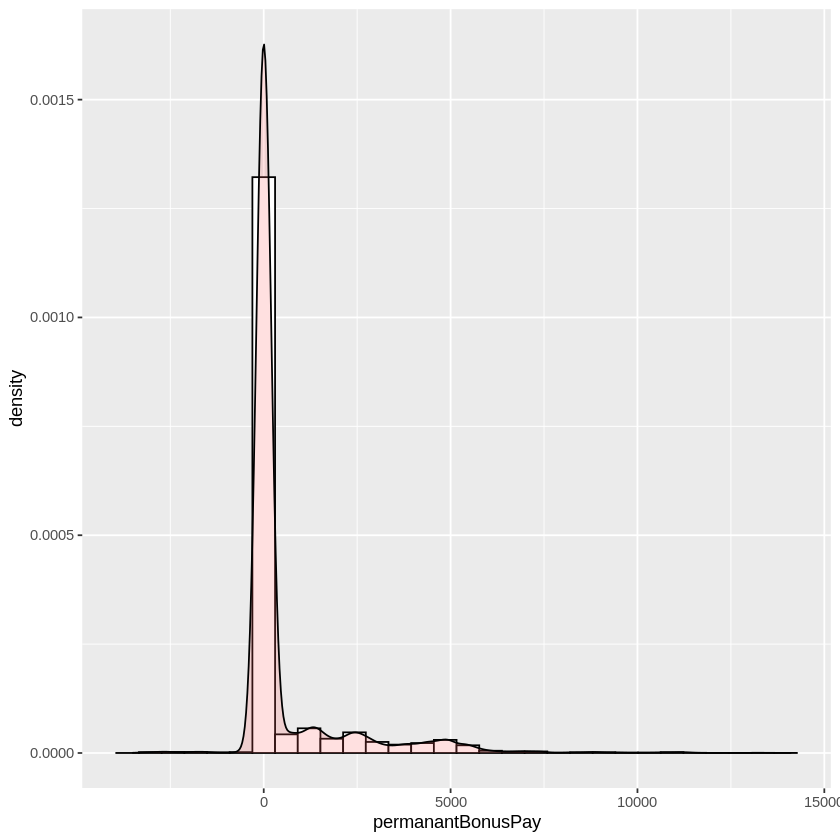

In [22]:
ggplot(data=pop_public_work, aes(x =permanantBonusPay)) +
         geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666")

Public Works-Sanitation Dept has both part time and full time employees we have to check if there are different trends among permanant bonus pay with respect to employee types.

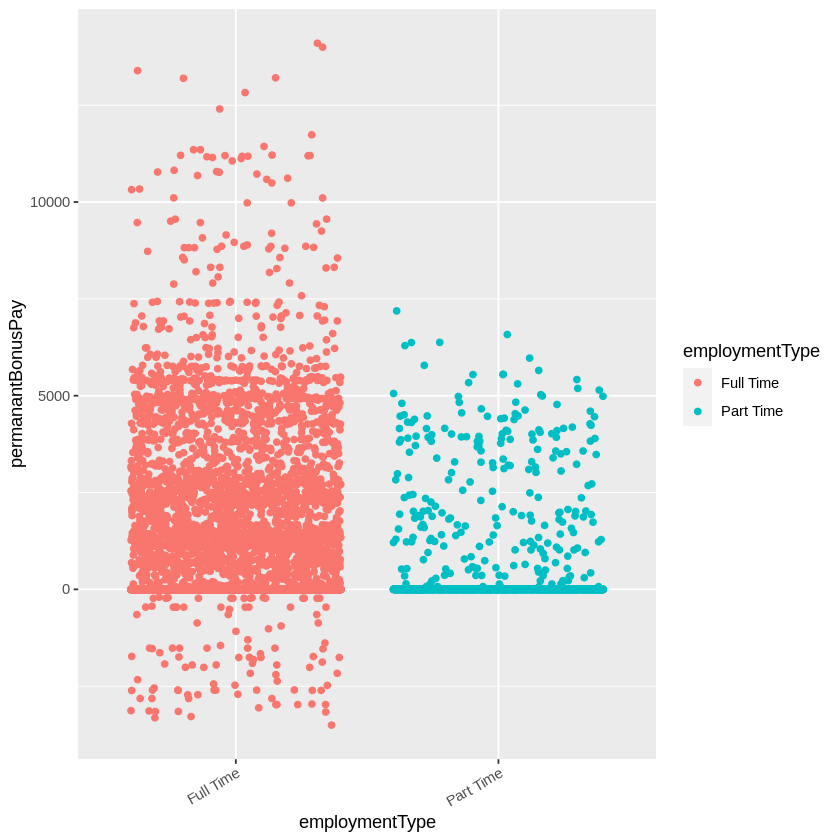

In [23]:
ggplot(pop_public_work, aes(x = employmentType, y = permanantBonusPay, color=employmentType)) + geom_jitter()+
    theme(axis.text.x = element_text(angle = 30, hjust = 1))

Part time and full time employees donot indicate any abnormality or outliers.They can both be used in the sample.


As population data is skewed, size of sample greater than 30 should be considered. taking n=100.

To ensure randomness and independence we will use simple random sampling and taking sample size less than 10% of population.

In [24]:
sample_public_work = pop_public_work[sample(nrow(pop_public_work), 100, replace = FALSE), ]

# **Stating hypothesis**
**Solution**


**Step 1:** Formulate Null and Alternative Hypothesis

Null hypothesis states that mean of permanant bonus pay given to Public Works-Sanitation Dept is greater than population mean.Whereas alternate hypothesis states that it is less than population mean.

1. Ho=u>uo

2. Ha=u<=uo

where uo=population mean



**Step 2:** Set significance level and Sample data conditions check

1. alpha=0.05

We’ll use default value of Significance Level, As it is a one tailed test, so our alpha <- 0.05. Now perform a condition check. 



**Step 3:** Calculate T-Statistics



**Step 4:** Draw Conculsion

Performing hypothesis test

In [25]:
res_public=t.test(sample_public_work$permanantBonusPay,mu=pop_mean2,alternative = "less")
res_public


	One Sample t-test

data:  sample_public_work$permanantBonusPay
t = -6.3365, df = 99, p-value = 3.492e-09
alternative hypothesis: true mean is less than 1497.571
95 percent confidence interval:
     -Inf 735.5929
sample estimates:
mean of x 
 465.0322 


Warning message:
“geom_vline(): Ignoring `data` because `xintercept` was provided.”


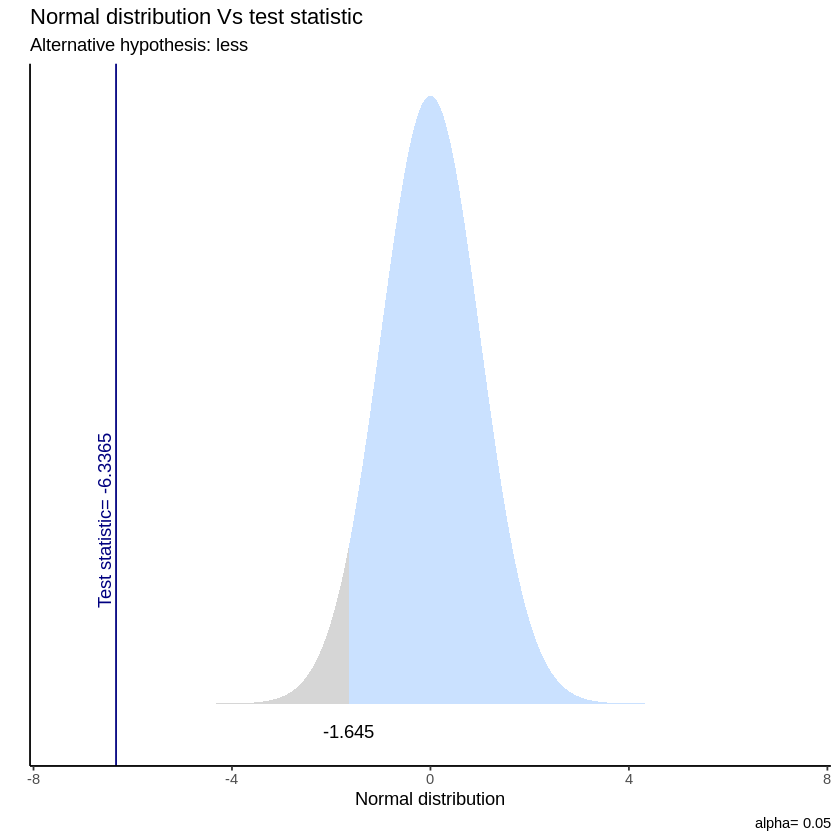

In [26]:
ggttest(res_public)

# **Question 2 Draw Conclusion**


As seen from the plots and p-value being **less than alpha we reject the null hypothesis** and conclude with 95% confidence level that mean permanant bonus pay given to Public Work Sanitation Department is less than population mean. This indicates that employees who receive permanant bonus pay are not likely to be from this department.




# **Question 3**
**Do the employees working in Water and Power (DWP) Department have a better chance of being employed overtime?**

In this task we have to check whether DWP Dept have better chance of its mean overtime pay being higher than other departments.

In [27]:
pop_mean3=mean(cleanData$overTimePay)

Extracting  DWP Dept population segment

In [28]:
pop_dwp_dept=cleanData[cleanData$department=="Water And Power (DWP)",]

Plotting population distribution.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



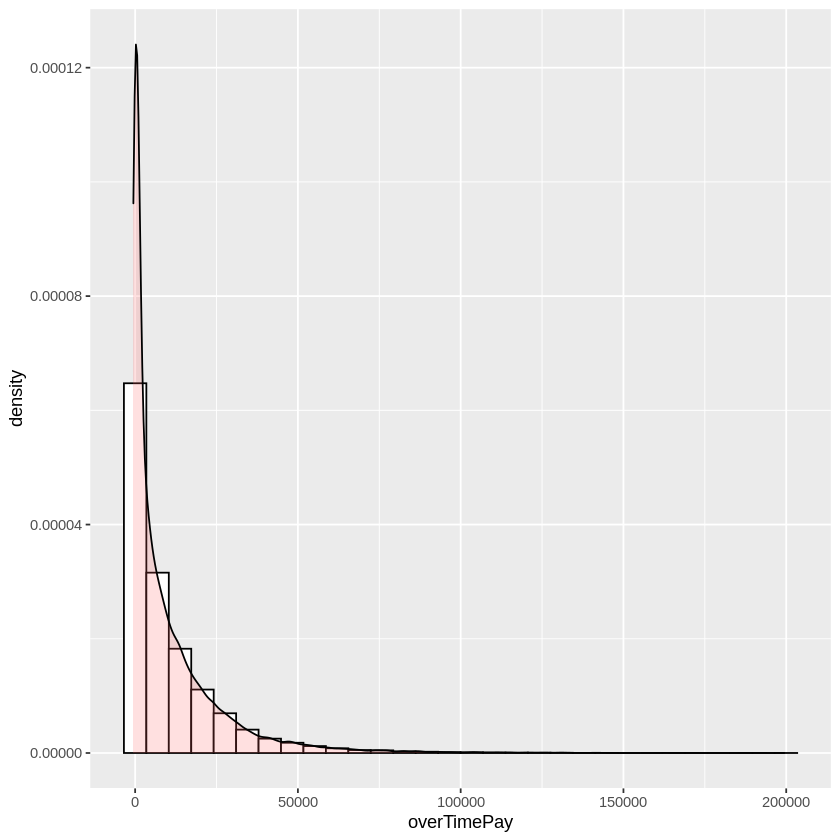

In [29]:
ggplot(data=pop_dwp_dept, aes(x =overTimePay)) +
         geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666")

As population data is skewed, size of sample greater than 30 should be considered. taking n=100.

To ensure randomness and independence we will use simple random sampling and taking sample size less than 10% of population.

In [30]:
sample_dwp_dept = pop_dwp_dept[sample(nrow(pop_dwp_dept), 100, replace = FALSE), ]

# **Stating hypothesis**
**Solution**


**Step 1:** Formulate Null and Alternative Hypothesis

Null hypothesis states that mean of overtime pay given to by DWP Dept is greater than population mean.Whereas alternate hypothesis states that it is less than population mean.

1. Ho=u>uo

2. Ha=u<=uo

where uo=population mean



**Step 2:** Set significance level and Sample data conditions check

1. alpha=0.05

We’ll use default value of Significance Level, As it is a one tailed test, so our alpha <- 0.05. Now perform a condition check. 



**Step 3:** Calculate T-Statistics



**Step 4:** Draw Conculsion

Performing hypothesis test

In [31]:
res_dwp_dept=t.test(sample_dwp_dept$overTimePay,mu=pop_mean3,alternative = "less")
res_dwp_dept


	One Sample t-test

data:  sample_dwp_dept$overTimePay
t = 1.9119, df = 99, p-value = 0.9706
alternative hypothesis: true mean is less than 6377.728
95 percent confidence interval:
     -Inf 10777.16
sample estimates:
mean of x 
   8732.3 


Warning message:
“geom_vline(): Ignoring `data` because `xintercept` was provided.”


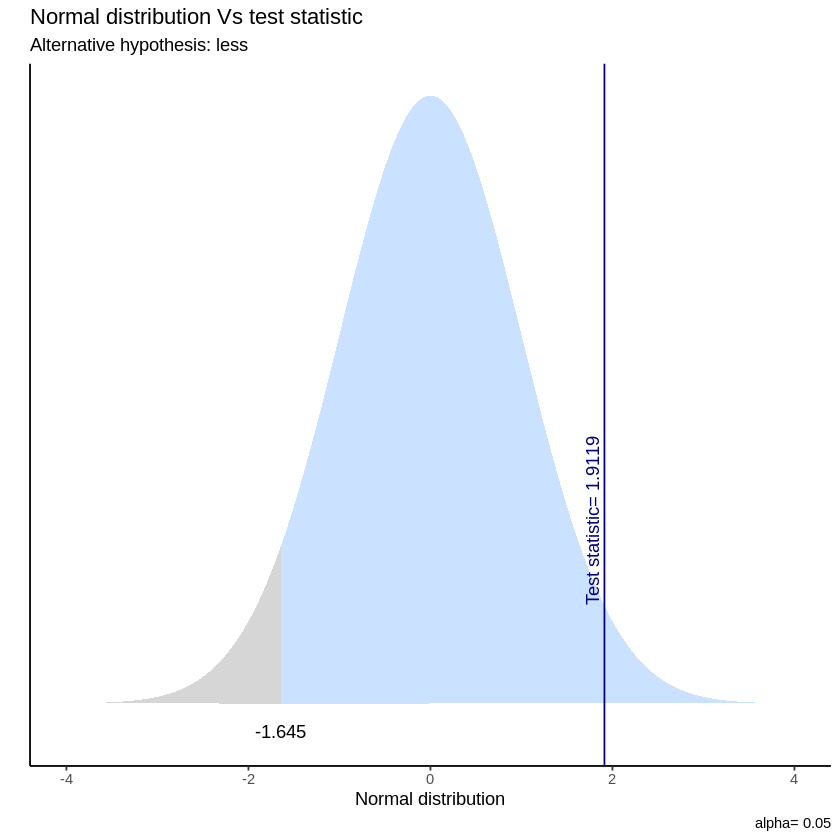

In [32]:
ggttest(res_dwp_dept)

# **Question 3 Draw Conclusion**
According to the plots and p-value being **greater than alpha we fail to reject null hypothesis** and conclude with 95% confidence level that DWP Dept has higher overtime pay than population mean.This indicates that DWP Dept has a better chance of being employed overtime.

# **Question 4**

**In 2014, employees of Recreation and Parks Department were complaining that they have been denied the Longevity Bonus Pay. Confirm their complaint from the given dataset.**

In this task we are required to check employees of Recreation And Parks Department have been given longevity bonus or not.

Extracting Recreation And Parks Dept in 2014 population segment.

In [33]:
population_rec_park=cleanData[cleanData$department=="Recreation And Parks"& cleanData$year=="2014",]

Plotting population distribution

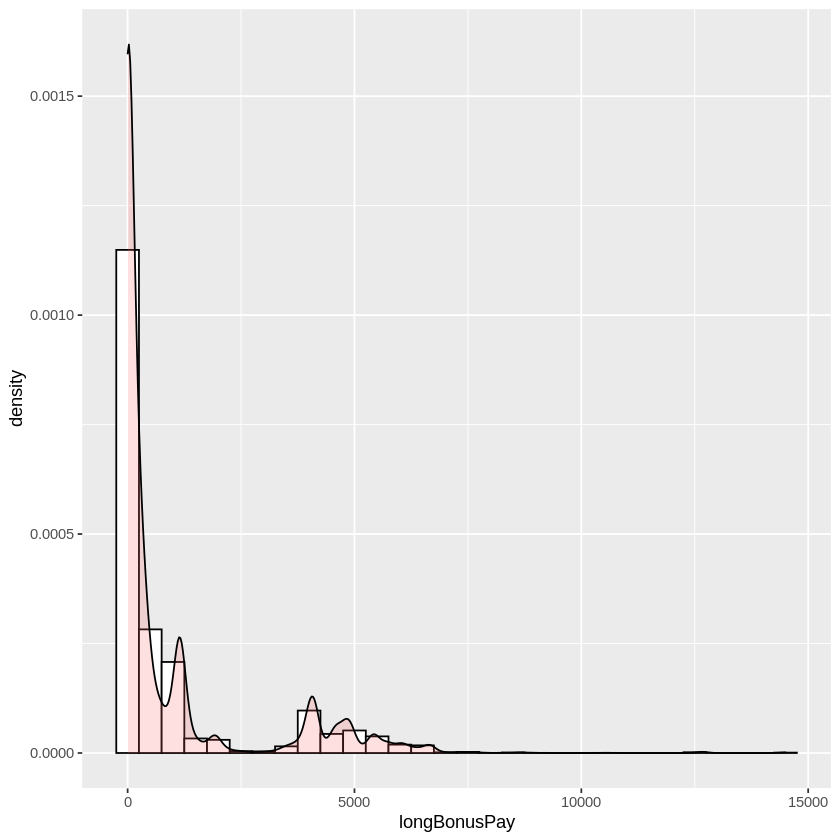

In [34]:
ggplot(data=population_rec_park, aes(x =longBonusPay)) +
         geom_histogram(aes(y=..density..), colour="black", fill="white",binwidth = 500)+
 geom_density(alpha=.2, fill="#FF6666")

Population data is skewed so n greater than 30 should be considered.For randomness we are using simple random sampling and for independence we are takin n<10% of population size.

In [35]:
sample_data_rec_park = population_rec_park[sample(nrow(population_rec_park), 40, replace = FALSE), ]

# **Stating hypothesis**
**Solution**


**Step 1:** Formulate Null and Alternative Hypothesis

Null hypothesis states that mean of longevity bonus provided to employees is 0 whereas alternate hypothesis states that mean of longevity bonus provided to employees is not 0.

1. Ho= u=0

2. Ha=u not equal to 0




**Step 2:** Set significance level and Sample data conditions check

1. alpha=0.01

We’ll use 0.01 of Significance Level for confidence level to 99%



**Step 3:** Calculate T-Statistics



**Step 4:** Draw Conculsion

Performing hypothesis test

In [36]:
res=t.test(sample_data_rec_park$longBonusPay,mu=0,conf.level = 0.99 )
res


	One Sample t-test

data:  sample_data_rec_park$longBonusPay
t = 3.7486, df = 39, p-value = 0.000576
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
  271.8359 1686.4691
sample estimates:
mean of x 
 979.1525 


Warning message:
“geom_vline(): Ignoring `data` because `xintercept` was provided.”


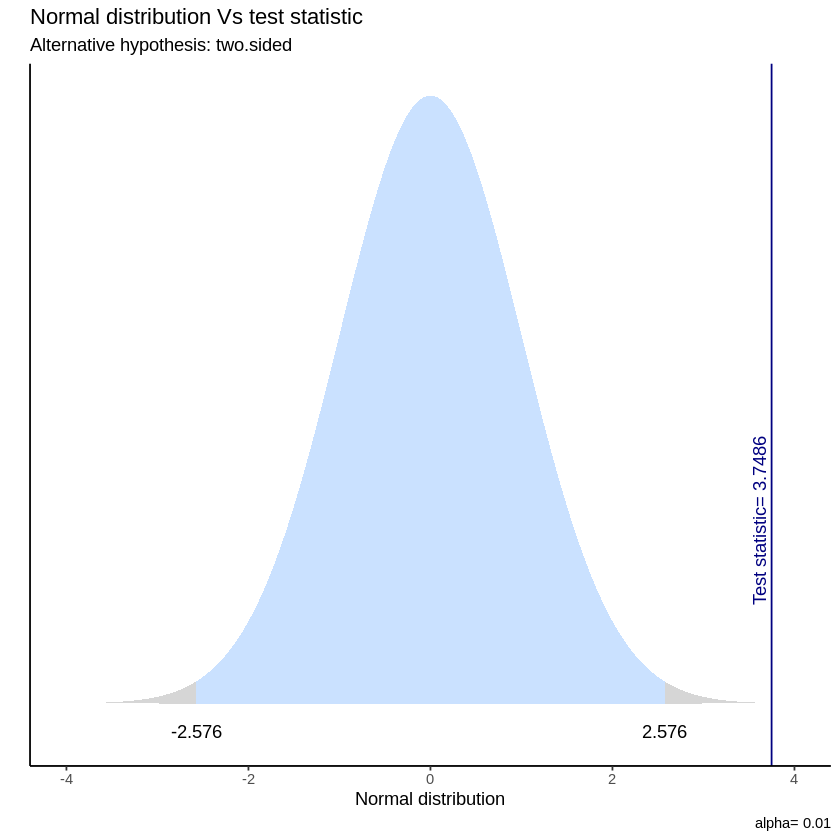

In [37]:
ggttest(res)


# **Question 4 Draw Conclusion**
As seen from the plots we reject the null hypothesis and can conclude that Recreation and Park Department has not been denied the longevity bonus.


# **QUESTION 5**
Senior Clerk Typist from Harbor (Port of LA) Department has been telling Senior Clerk Typist of Water and Power (DWP) Department that they have more Average Health Cost than them?


In [38]:
population_harbor_typist=cleanData[cleanData$department=="Harbor (Port of LA)" & cleanData$jobClassTitle=="Senior Clerk Typist",]

population_dwp_typist=cleanData[cleanData$department=="Water And Power (DWP)" & cleanData$jobClassTitle=="Senior Clerk Typist",]

Checking the distribution of DWP-Typist population, it is not normal.

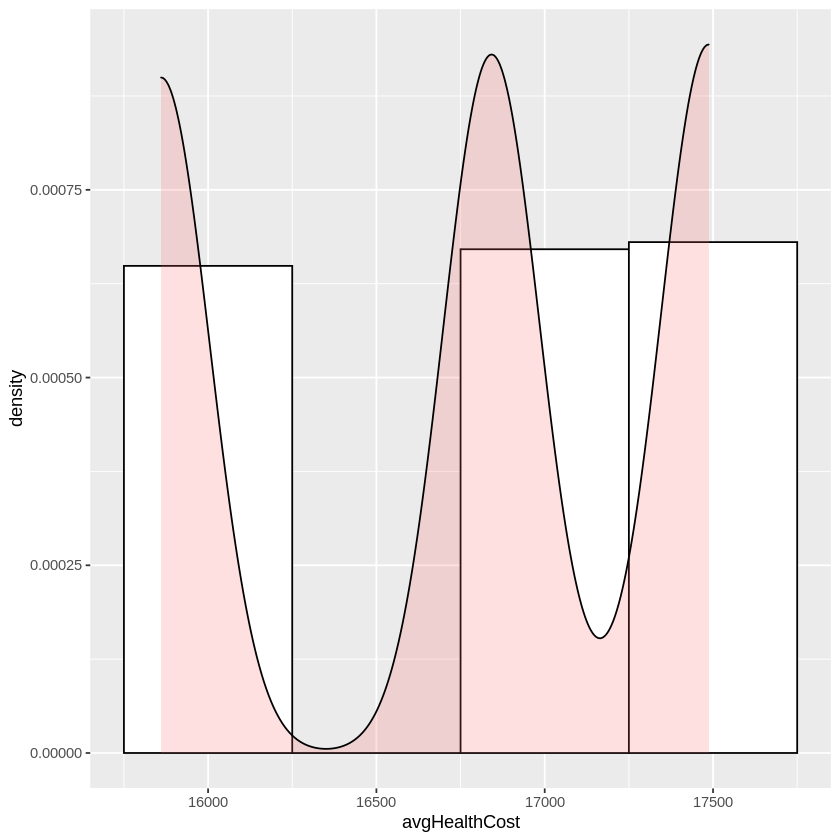

In [39]:
ggplot(data=population_dwp_typist, aes(x =avgHealthCost)) +
         geom_histogram(aes(y=..density..), colour="black", fill="white",binwidth =500)+
 geom_density(alpha=.2, fill="#FF6666")

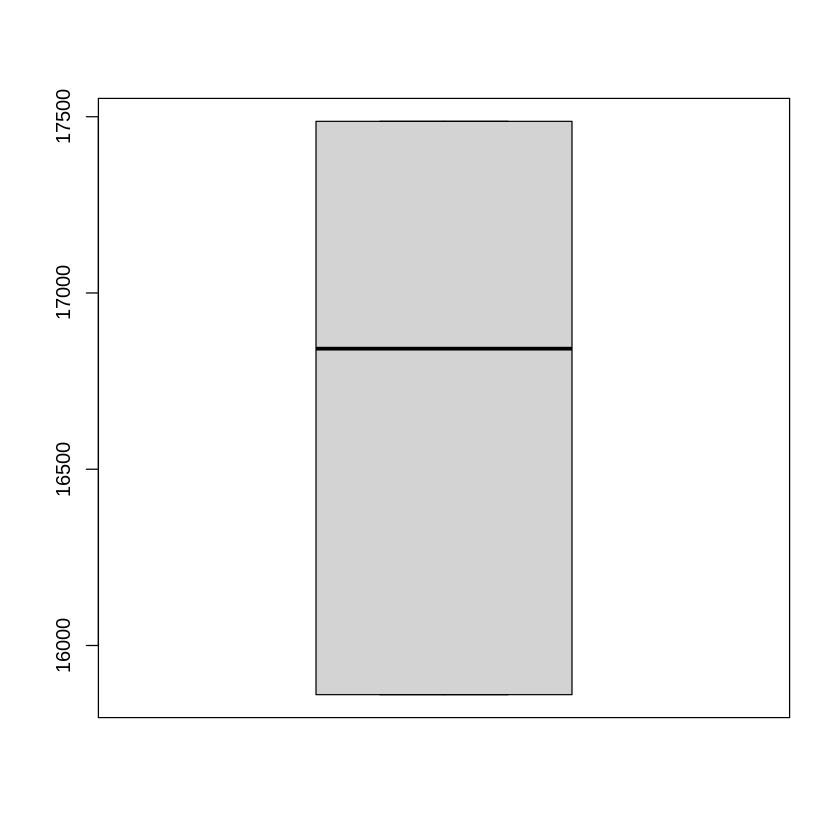

In [40]:
boxplot(population_dwp_typist$avgHealthCost)

The population contains no outliers as indicated from the boxplot.

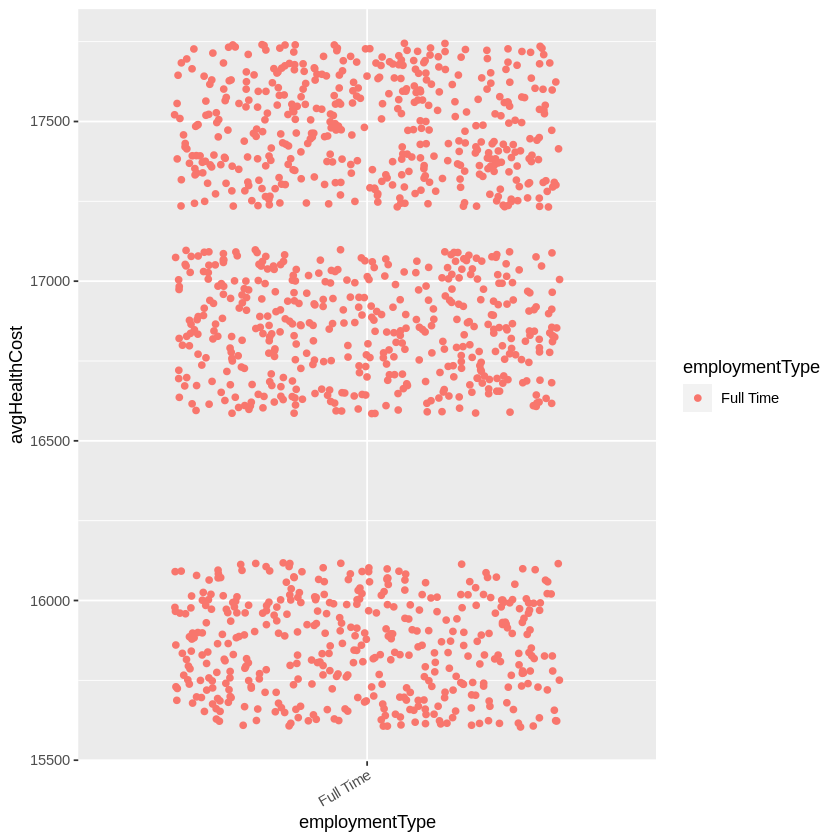

In [41]:
ggplot(population_dwp_typist, aes(x = employmentType, y = avgHealthCost, color=employmentType)) + geom_jitter()+
    theme(axis.text.x = element_text(angle = 30, hjust = 1))

Checking the distribution of Harbor-Typist population, it is not normal and indicates existence of outliers.

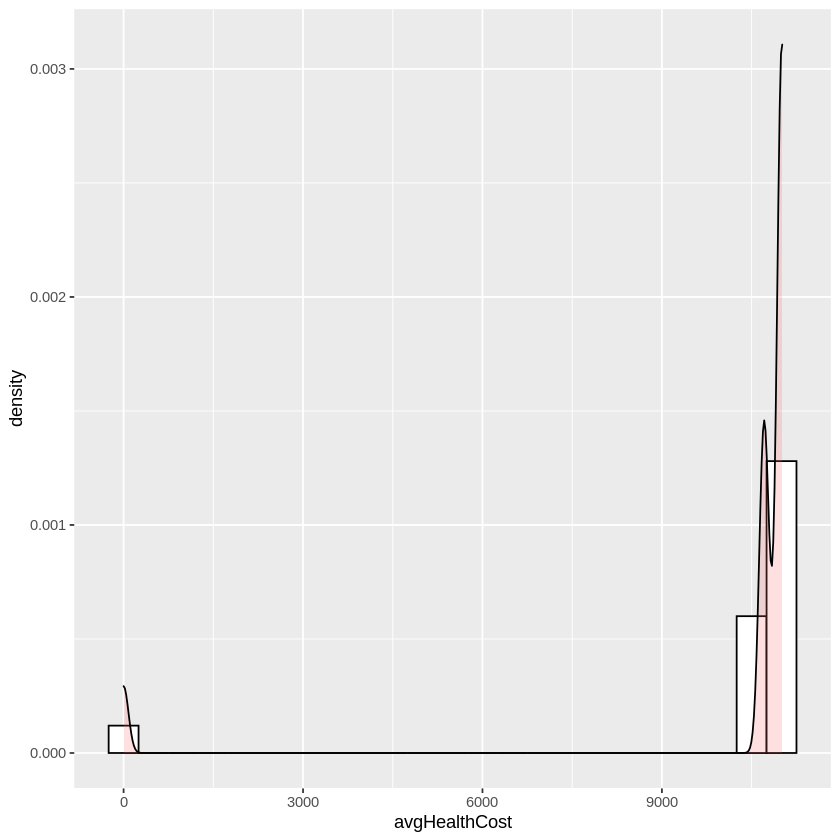

In [42]:
ggplot(data=population_harbor_typist, aes(x =avgHealthCost)) +
         geom_histogram(aes(y=..density..), colour="black", fill="white",binwidth =500)+
 geom_density(alpha=.2, fill="#FF6666")

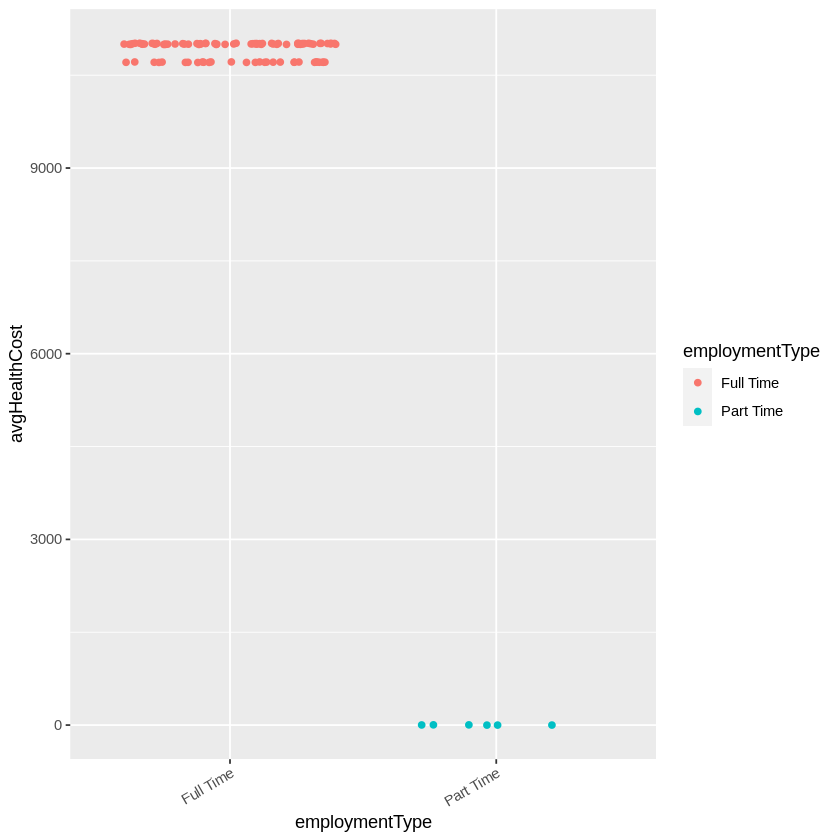

In [43]:
ggplot(population_harbor_typist, aes(x = employmentType, y = avgHealthCost, color=employmentType)) + geom_jitter()+
    theme(axis.text.x = element_text(angle = 30, hjust = 1))

It can be seen that senior clerk typist in Harbor Dept who work on part time basis donot get health cost, apart from that all DWP Dept senior clerk typist work full time. So we will remove part time typist from Harbor dept.

In [44]:
population_harbor_typist=population_harbor_typist[population_harbor_typist$avgHealthCost!=0,]

Extracting samples

In [45]:
sample_dwp_typist=population_dwp_typist[ sample(nrow(population_dwp_typist),40,replace = FALSE),]
sample_harbor_typist=population_harbor_typist[sample(nrow(population_harbor_typist),40,replace=TRUE ),]

# **Stating hypothesis**
**Solution**


**Step 1:** Formulate Null and Alternative Hypothesis



1. Ho= Null hypothesis states that average health cost of senior clerk typist from Harbor(Port of LA) Dept is greater than that of senior clerk typist from DWP Dept

2. Ha= alternate hypothesis states that average health cost of senior clerk typist from Harbor(Port of LA) Dept is less than that of senior clerk typist from DWP Dept




**Step 2:** Set significance level and Sample data conditions check

1. alpha=0.05

We’ll use default value of Significance Level, As it is a one tailed test, so our alpha <- 0.05. Now perform a condition check



**Step 3:** Calculate T-Statistics



**Step 4:** Draw Conculsion

Performing hypothesis test

In [46]:
depts=c( (rep(c("DWP"),times=nrow(sample_dwp_typist) )  ) ,  (rep(c("Harbor"),times=nrow(sample_harbor_typist) )  ) )
vals=c(sample_dwp_typist$avgHealthCost,sample_harbor_typist$avgHealthCost)

hypDf=data.frame(depts=depts,vals=vals)

Performing two sample t test

In [47]:
res=t.test(vals~depts, data=hypDf ,alternative = "less", var.equal=TRUE)
res


	Two Sample t-test

data:  vals by depts
t = 54.583, df = 78, p-value = 1
alternative hypothesis: true difference in means between group DWP and group Harbor is less than 0
95 percent confidence interval:
     -Inf 5983.618
sample estimates:
   mean in group DWP mean in group Harbor 
            16716.53             10910.00 


Warning message:
“geom_vline(): Ignoring `data` because `xintercept` was provided.”


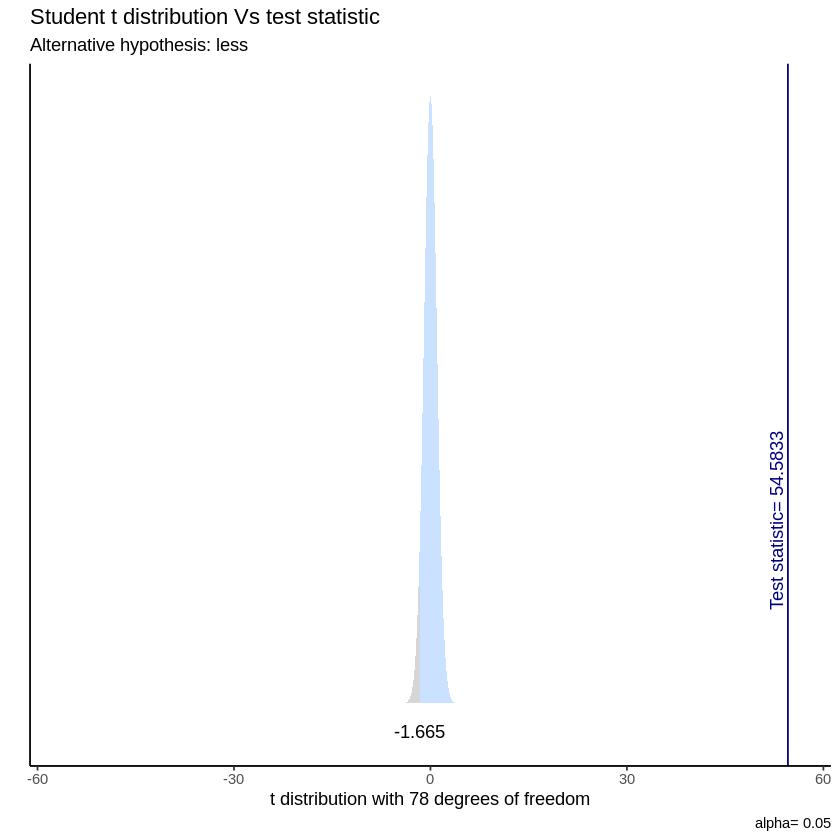

In [48]:
ggttest(res)

# **Question 5 Draw Conclusion**
As seen from the plot and p-value being** greater than alpha we fail to reject null hypothesis** and can conclude that average health cost of senior clerk typist from Harbor(Port of LA) Dept is greater than that of senior clerk typist from DWP Dept.